In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit =  pd.read_csv(r"credit_card.csv")
credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [21]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [22]:
df_credit = credit.drop(columns=['Customer Key', 'Sl_No'], axis=1)
df_credit.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

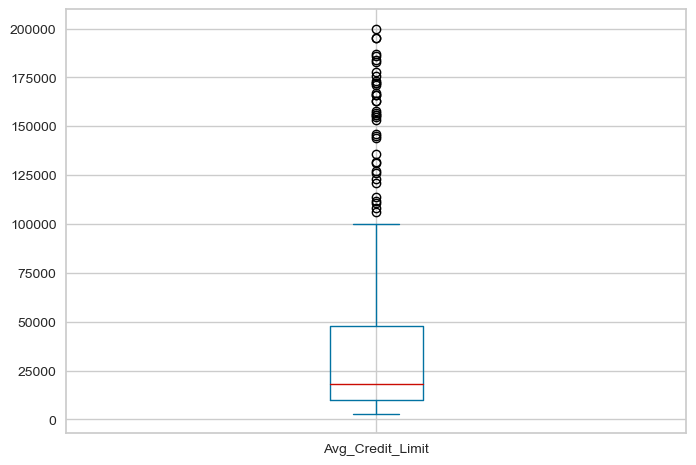

In [23]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

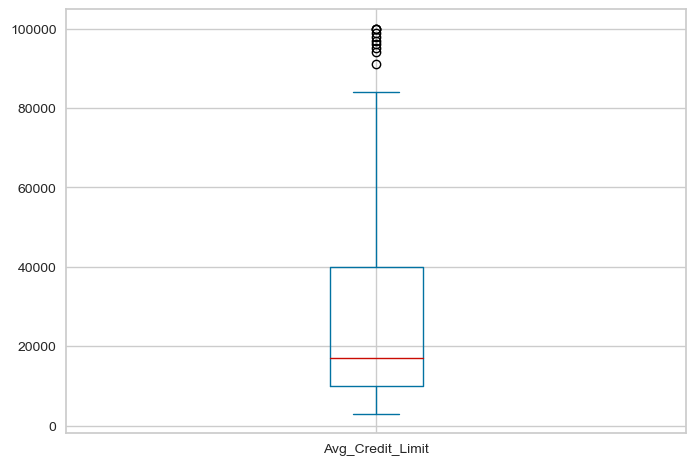

In [24]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df_in, col_name):
    df_out = df_in.copy()
    if is_numeric_dtype(df_in[col_name]):
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        
        iqr = q3 - q1
        upper_bound = q3 + (iqr * 1.5)
        lower_bound = q1 - (iqr * 1.5)
        
        df_out = df_out.loc[(df_out[col_name] >= lower_bound) & (df_out[col_name] <= upper_bound)]
    return df_out

credit_clean = remove_outlier(df_credit, "Avg_Credit_Limit")

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", credit_clean.shape[0])

credit_clean['Avg_Credit_Limit'].plot(kind='box')

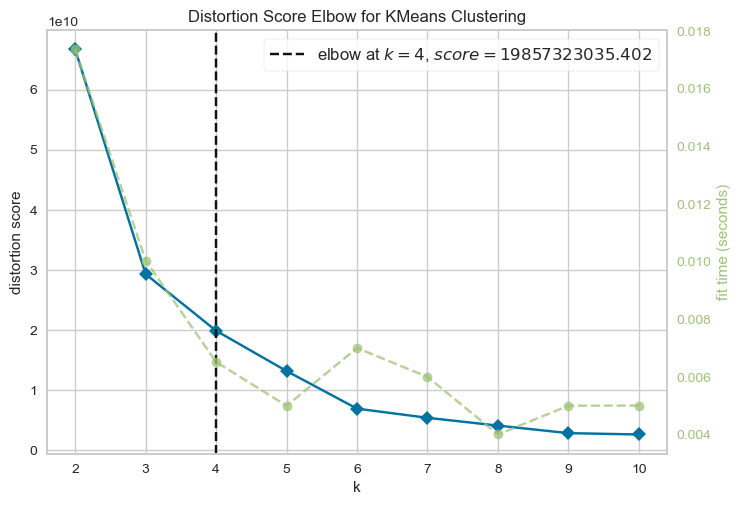

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=78)
vis = KElbowVisualizer(kMeansC, k=(2,11))
vis.fit(credit_clean)

vis.show()

Silhouette Score K-Means for  2 Clusters :  0.7275517813087928
Silhouette Score K-Means for  3 Clusters :  0.7058100919802311
Silhouette Score K-Means for  4 Clusters :  0.7094276225317143
Silhouette Score K-Means for  5 Clusters :  0.6984206055991159
Silhouette Score K-Means for  6 Clusters :  0.6176747811139572
Silhouette Score K-Means for  7 Clusters :  0.6103882163480778
Silhouette Score K-Means for  8 Clusters :  0.5890945232704698
Silhouette Score K-Means for  9 Clusters :  0.6069167675816625
Silhouette Score K-Means for  10 Clusters :  0.5912878997785384


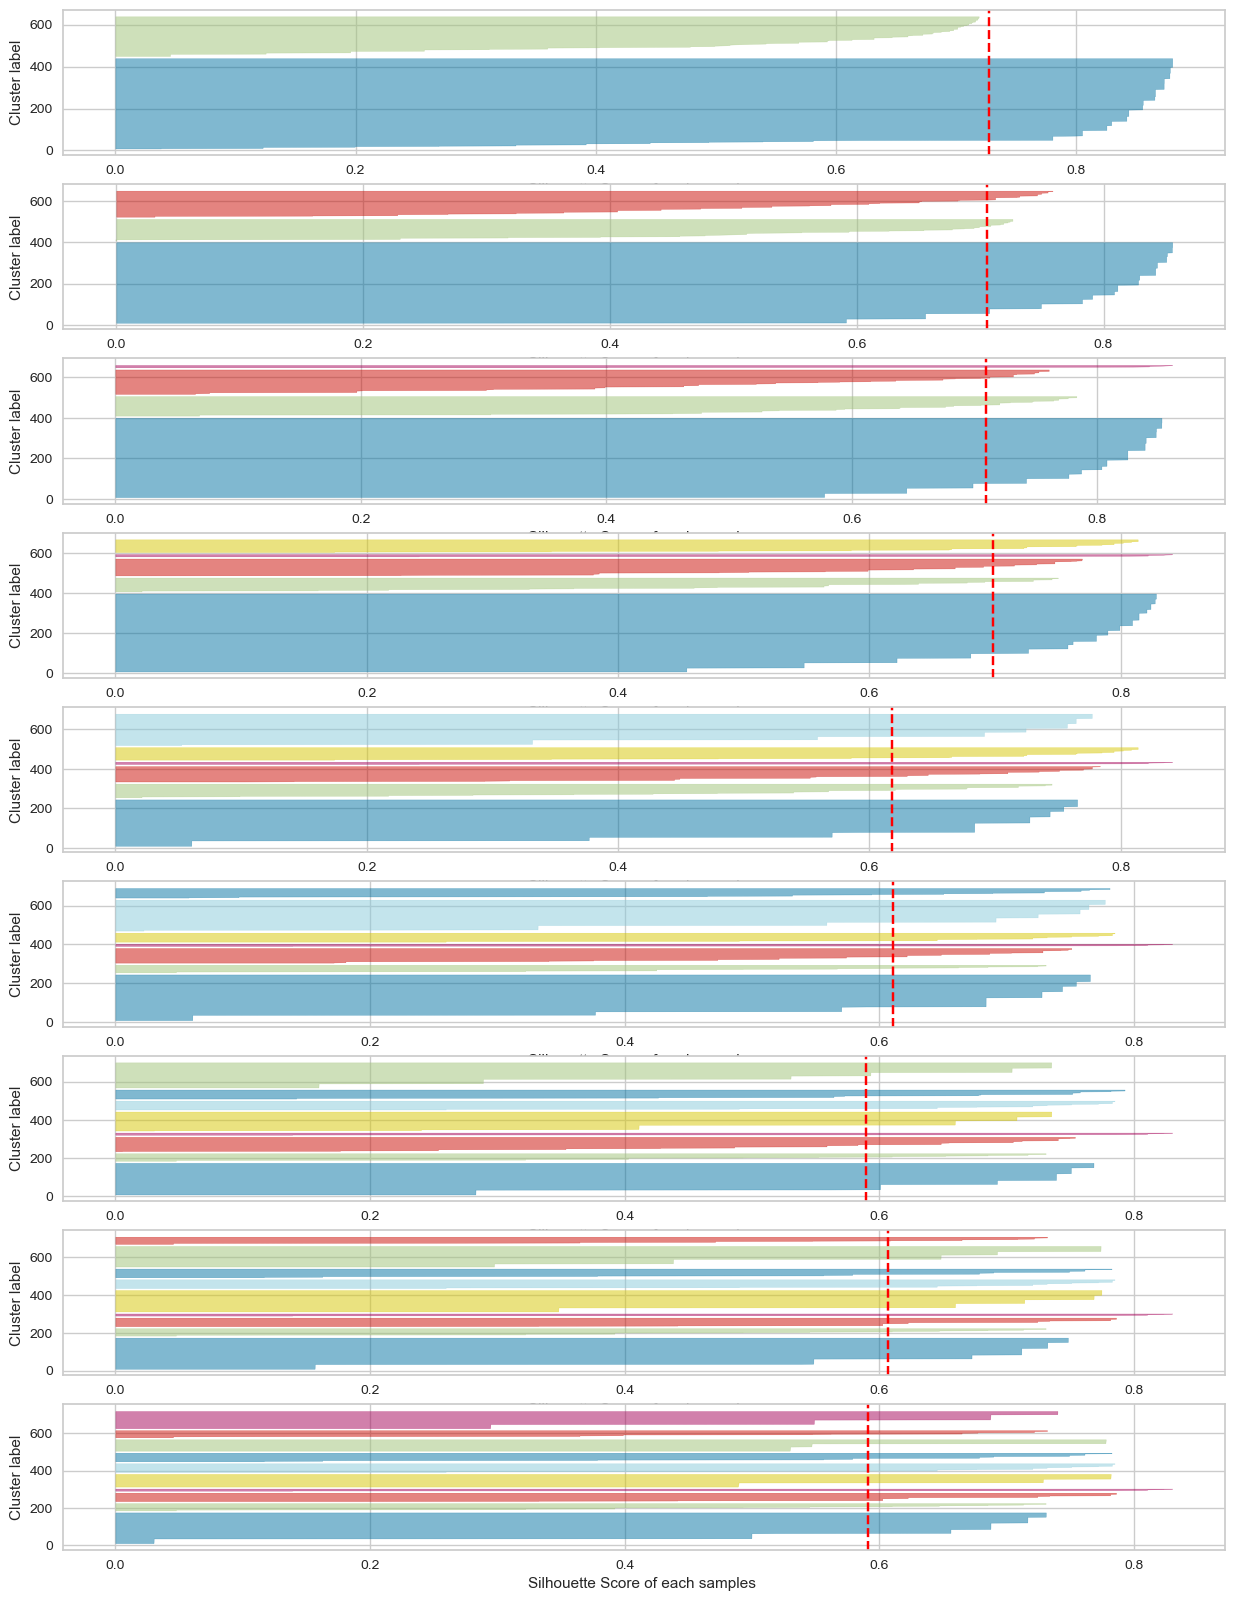

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 1, figsize=(15, 20))

for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=78)
    KM_clusters = kMeansC.fit_predict(credit_clean)
    print("Silhouette Score K-Means for ", k, "Clusters : ", silhouette_score(credit_clean, KM_clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors="yellowbrick", ax=ax[k-2])
    sil_vis.fit(credit_clean)
    ax[k-2].set(xlabel="Silhouette Score of each samples ", ylabel="Cluster label")

In [27]:
credit_clean.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

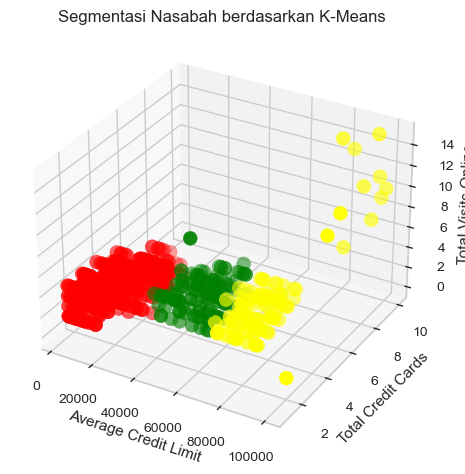

Silhouette Score K-Means : 0.706 


In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=78)
K_Clusters = kmeans.fit_predict(credit_clean)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1:'yellow', 2:'green', 3:'blue', 4:'magenta', 5:'black', 6:'cyan'}
ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'], c=[cluster_colors[i] for i in K_Clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means : %0.3f " % silhouette_score(credit_clean, K_Clusters))

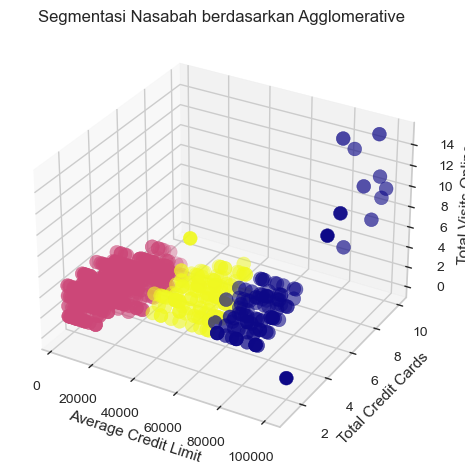

Silhouette Score K-Means: 0.705 


In [29]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(credit_clean)
cmap = ListedColormap(sns.color_palette('plasma', 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'], c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f " % silhouette_score(credit_clean, AGG_clusters))

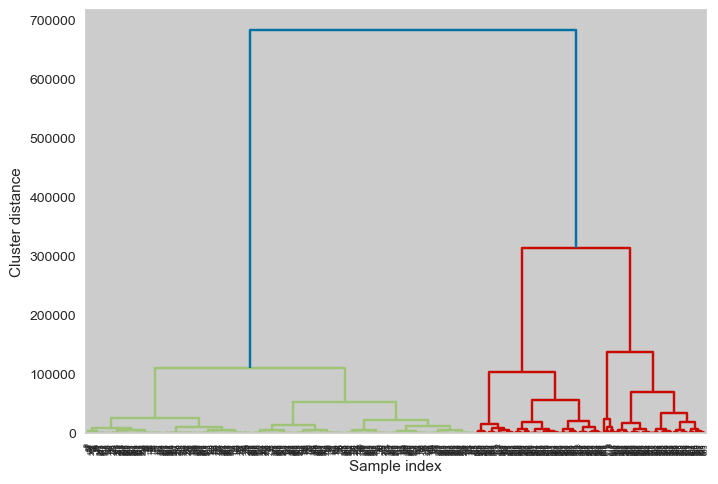

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(credit_clean, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

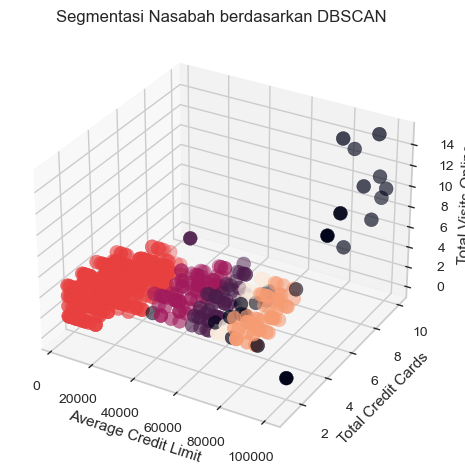

Silhouette Score K-Means: 0.657 


In [31]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(credit_clean)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'], c=DBSC_clusters, cmap=cmap, s=100)

plt.title("Segmentasi Nasabah berdasarkan DBSCAN")
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f " % silhouette_score(credit_clean, DBSC_clusters))

In [32]:
import pickle as pkl

with open('KMeans_model.pkl', 'wb') as r:
    pkl.dump((kmeans), r)

with open('AGG_model.pkl', 'wb') as r:
    pkl.dump((AGG), r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pkl.dump((DBSC), r)

print('Model berhasil disimpan!')

Model berhasil disimpan!
